In [71]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd# data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300
import matplotlib.pyplot as plt
import geopandas as gpd

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ipedsdataset/EFFY_2015-2021_data.csv
/kaggle/input/ipedsdataset/HD_2015-2021_data.csv


In [86]:
gpd.datasets.available

['naturalearth_cities', 'naturalearth_lowres', 'nybb']

Join on all students

In [8]:
filename_effy = "/kaggle/input/ipedsdataset/EFFY_2015-2021_data.csv"
df_effy = pd.read_csv(filename_effy)
df_effy = df_effy.loc[df_effy['effyalev'] == "All students total"]
df_effy = df_effy[["unitid","efytotlt","efyaiant","efyasiat","efybkaat","efyhispt","efynhpit","efywhitt","efy2mort","efyunknt","year"]]

In [11]:
filename_hd = "/kaggle/input/ipedsdataset/HD_2015-2021_data.csv"
df_hd = pd.read_csv(filename_hd)
df_hd = df_hd[["unitid","stabbr","longitud","latitude"]]
df = pd.merge(df_effy,df_hd,on="unitid")

In [38]:
no_lat_long = df.loc[(df["longitud"] == ".") & (df["latitude"] == ".")]
no_lat_long

,unitid,efytotlt,efyaiant,efyasiat,efybkaat,efyhispt,efynhpit,efywhitt,efy2mort,efyunknt,year,stabbr,longitud,latitude
5250,120166,55,0,8,0,0,0,3,0,0,2021,California,.,.
5255,120166,54,0,3,0,0,0,1,1,0,2020,California,.,.


In [69]:
#Cleaning bad values
df = df.loc[(df["longitud"] != ".") & (df["latitude"] != ".")]
df2021 = df.loc[df["year"] == 2021]

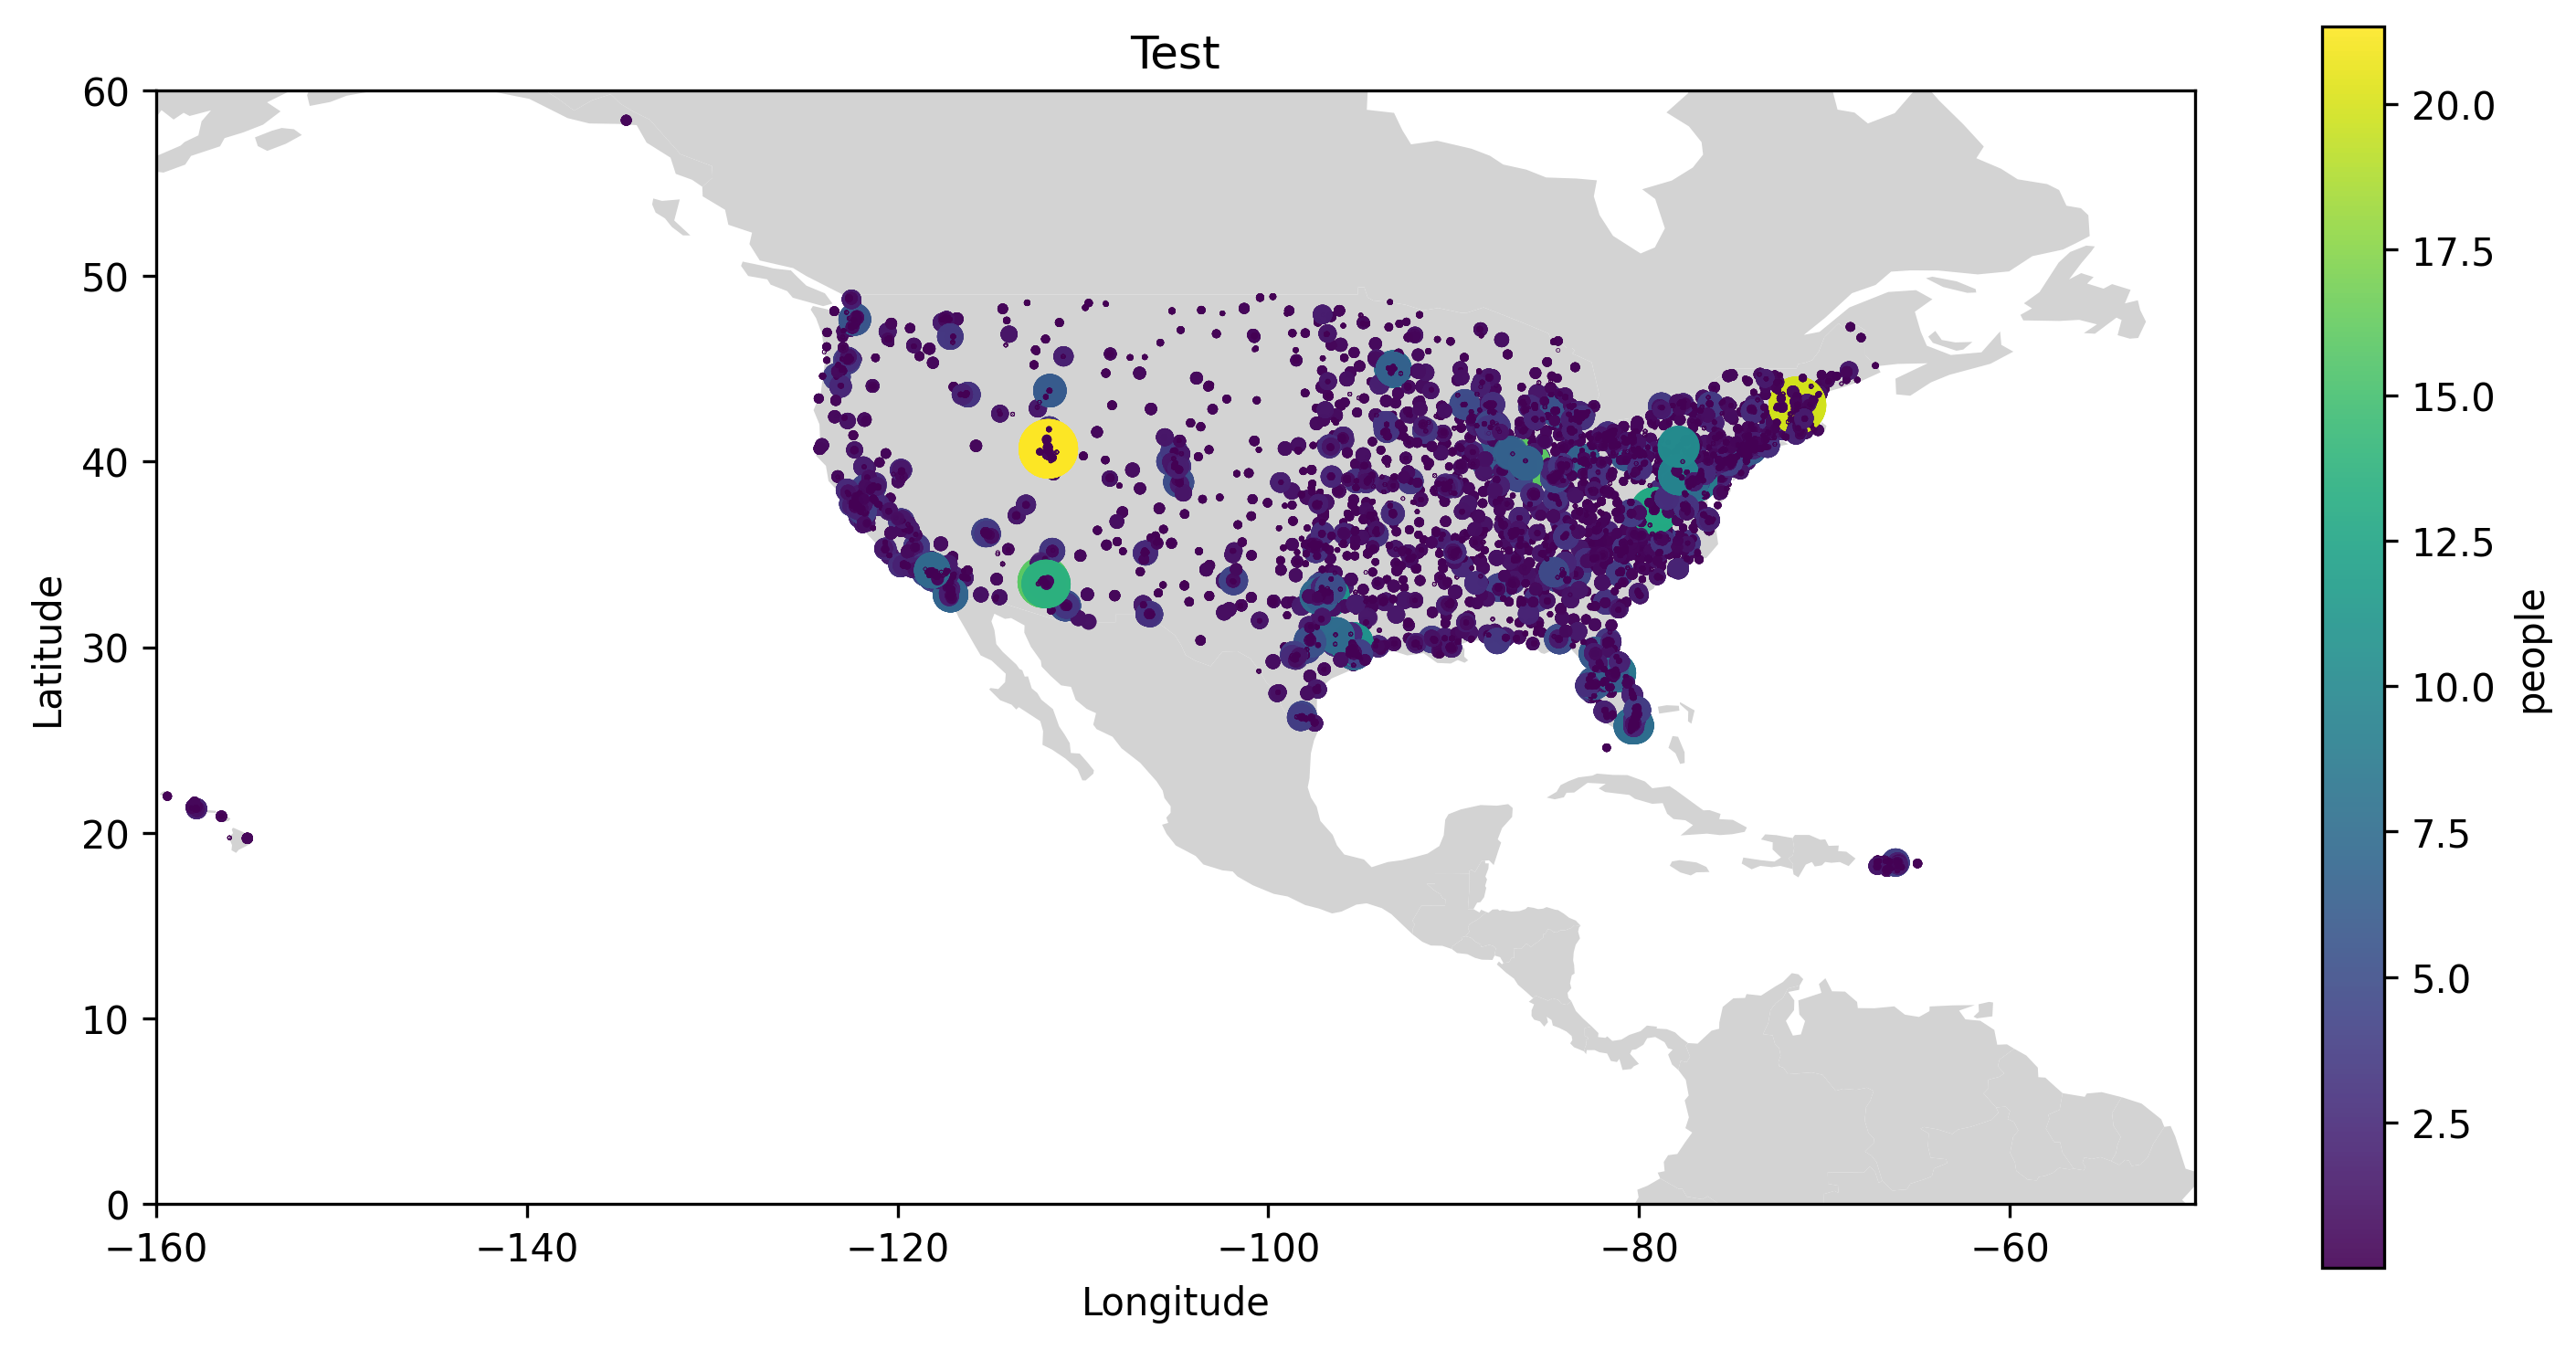

In [84]:
worldmap = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

fig, ax = plt.subplots(figsize=(12, 6))
worldmap.plot(color="lightgrey", ax=ax)

plt.scatter(df2021["longitud"].astype(float),df2021["latitude"].astype(float),c=df2021["efytotlt"].astype(float)/10000, s=df2021["efytotlt"].astype(float)/1000, alpha=0.9)
plt.colorbar(label='people')

plt.xlim([-160, -50])
plt.ylim([0, 60])

plt.title("Test")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.savefig('test_visualisation.png')